# Movie Reccomendation System



In [2]:
#initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data 
Import the four datasets to inspect and eventually combine into one dataframe for modeling.

The data is in the data folder:
* data/links.csv
* data/movies.csv
* data/ratings.csv
* data/tags.csv

###  Links dataframe

this dataframe will come in handy if we end up using additional data from imdb and the tmd for features in our model.

In [3]:
links = pd.read_csv('data/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### Movies DataFrame

this contains the title and genre of the movies. The movieId column matches with our links dataframe. For example movieId 1 matches  with movieId Toystory.  

In [5]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
#extract the year of film from the title using regex to extract the year
movies['year'] = movies.title.str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Ratings DataFrame 

This dataframe contains userId, movieId, rating and a timestamp.

In [8]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
ratings.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

### Tags DataFrame

The tags dataframe has userId, movieId, tag and timestamp

In [12]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Tags may be an important feature we will want to explore the tags and see if we can pinpoint some of the most used tags to add to our data

In [14]:
#tag value counts
tags.tag.value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
not linear             1
Quirky                 1
Music                  1
Up series              1
voyeurism              1
Name: tag, Length: 1589, dtype: int64

In [15]:
#create tag dictionary
keys = tags['tag'].value_counts(dropna=False).keys().tolist()
vals = tags['tag'].value_counts(dropna=False).tolist()
tag_dict = dict(zip(keys, vals))
tag_dict

{'In Netflix queue': 131,
 'atmospheric': 36,
 'thought-provoking': 24,
 'superhero': 24,
 'funny': 23,
 'Disney': 23,
 'surreal': 23,
 'religion': 22,
 'quirky': 21,
 'psychology': 21,
 'dark comedy': 21,
 'sci-fi': 21,
 'suspense': 20,
 'crime': 19,
 'visually appealing': 19,
 'twist ending': 19,
 'politics': 18,
 'music': 16,
 'mental illness': 16,
 'time travel': 16,
 'dark': 15,
 'comedy': 15,
 'aliens': 15,
 'space': 14,
 'dreamlike': 14,
 'mindfuck': 14,
 'heist': 13,
 'black comedy': 13,
 'emotional': 13,
 'Shakespeare': 12,
 'Stephen King': 12,
 'journalism': 12,
 'disturbing': 12,
 'anime': 12,
 'court': 12,
 'satire': 12,
 'high school': 12,
 'action': 12,
 'boxing': 11,
 'classic': 11,
 'Holocaust': 11,
 'imdb top 250': 11,
 'adultery': 11,
 'comic book': 11,
 'psychological': 11,
 'adolescence': 11,
 'robots': 10,
 'philosophical': 10,
 'drugs': 10,
 'Australia': 10,
 'remake': 10,
 'Vietnam': 10,
 'animation': 10,
 'England': 10,
 'cinematography': 10,
 'Leonardo DiCaprio

We may come back to the tags later. 

## Combined DataFrame

Below we will add the movie titles and genres to the ratings data to make a combined data frame

1. start the ratings dataframe and drop the timestamp.
2. use the movieId column to add the title and genre of the movie

In [16]:
#combined dataframe
#drop the timestamp column
df = ratings.drop('timestamp', axis=1)
#add title,genre and year using merge how=left will prevent more rows being added
df = df.merge(movies, on='movieId', how='left')
df.head()


,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [17]:
df.shape

(100836, 6)

In [65]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


User ids range from 1-610.  We will need to create new user ids that are outside of this range.


## Further Data Exploration


In [18]:
#number of unique users
n_users = df.userId.nunique()
print(n_users,'users that have rated movies.')
##movies rated
mov_rat=df.movieId.nunique()
print(mov_rat,'different movies rated')

610 users that have rated movies.
9724 different movies rated


In [86]:
##top 20 best rated movies
agg_function = {'rating':['mean','count']}
movie_ratings = df.groupby(['movieId','title','genres']).agg(agg_function)
movie_ratings.sort_values(by=('rating','mean'), ascending=False)

rating  \
                                                                                mean   
movieId title                                 genres                                   
88448   Paper Birds (Pájaros de papel) (2010) Comedy|Drama                       5.0   
100556  Act of Killing, The (2012)            Documentary                        5.0   
143031  Jump In! (2007)                       Comedy|Drama|Romance               5.0   
143511  Human (2015)                          Documentary                        5.0   
143559  L.A. Slasher (2015)                   Comedy|Crime|Fantasy               5.0   
...                                                                              ...   
157172  Wizards of the Lost Kingdom II (1989) Action|Fantasy                     0.5   
85334   Hard Ticket to Hawaii (1987)          Action|Comedy                      0.5   
53453   Starcrash (a.k.a. Star Crash) (1978)  Action|Adventure|Fantasy|Sci-Fi    0.5   
8494    Cincinnati Kid, The (1965)            Drama                              0.5   
71810   Legionnaire (1998)                    Action|Adventure|Drama|War         0.5   

                                                                                     
                                                                              count  
movieId title                                 genres                                 
88448   Paper Birds (Pájaros de papel) (2010) Comedy|Drama                        1  
100556  Act of Killing, The (2012)            Documentary                         1  
143031  Jump In! (2007)                       Comedy|Drama|Romance                1  
143511  Human (2015)                          Documentary                         1  
143559  L.A. Slasher (2015)                   Comedy|Crime|Fantasy                1  
...                                                                             ...  
157172  Wizards of the Lost Kingdom II (1989) Action|Fantasy                      1  
85334   Hard Ticket to Hawaii (1987)          Action|Comedy                       1  
53453   Starcrash (a.k.a. Star Crash) (1978)  Action|Adventure|Fantasy|Sci-Fi     1  
8494    Cincinnati Kid, The (1965)            Drama                               1  
71810   Legionnaire (1998)                    Action|Adventure|Drama|War          1  

[9724 rows x 2 columns]

We can see that we have many 5 rated movies as well as many .5 rated movies.  It is good to know how many times each movie was rated as I have never heard of any of the movies that are currently listed at the top of the rating list.  We have added the count to the agg function so now we can sort the movies by count.

In [87]:
movie_ratings.sort_values(by=('rating','count'), ascending=False)

rating  \
                                                                                mean   
movieId title                                  genres                                  
356     Forrest Gump (1994)                    Comedy|Drama|Romance|War     4.164134   
318     Shawshank Redemption, The (1994)       Crime|Drama                  4.429022   
296     Pulp Fiction (1994)                    Comedy|Crime|Drama|Thriller  4.197068   
593     Silence of the Lambs, The (1991)       Crime|Horror|Thriller        4.161290   
2571    Matrix, The (1999)                     Action|Sci-Fi|Thriller       4.192446   
...                                                                              ...   
4093    Cop (1988)                             Thriller                     1.500000   
4089    Born in East L.A. (1987)               Comedy                       2.000000   
58351   City of Men (Cidade dos Homens) (2007) Drama                        4.000000   
4083    Best Seller (1987)                     Thriller                     4.000000   
193609  Andrew Dice Clay: Dice Rules (1991)    Comedy                       4.000000   

                                                                                  
                                                                           count  
movieId title                                  genres                             
356     Forrest Gump (1994)                    Comedy|Drama|Romance|War      329  
318     Shawshank Redemption, The (1994)       Crime|Drama                   317  
296     Pulp Fiction (1994)                    Comedy|Crime|Drama|Thriller   307  
593     Silence of the Lambs, The (1991)       Crime|Horror|Thriller         279  
2571    Matrix, The (1999)                     Action|Sci-Fi|Thriller        278  
...                                                                          ...  
4093    Cop (1988)                             Thriller                        1  
4089    Born in East L.A. (1987)               Comedy                          1  
58351   City of Men (Cidade dos Homens) (2007) Drama                           1  
4083    Best Seller (1987)                     Thriller                        1  
193609  Andrew Dice Clay: Dice Rules (1991)    Comedy                          1  

[9724 rows x 2 columns]

Now the movies at the top of the list are recognizable.  Now we have an idea of movies that have been rated alot and most likely watched the most.  This will be helpful when selecting movies for new users to rate.  We want to only suggest movies that we currently have a good number of ratings for.  This will make it more likely that they have seen the movie and it will make our model more useful because their will me users that have rated those movies.

Currently we have movies with anywhere from 1-329 rankings.  

##### Finding the Best Movies for User Survey

It may be interesting to find movies that have a good balance amoung ratings.  These movies may be better at pinpointing what a new user may like.  for example movies that get mostly ratings of 4 or 5 may not tell us as much about a viewer as movies that recieve an equal amount of ratings from 1-5 or polarizing ratings. How do we do this...

For the sake of time we will limit the movies included in the user survey to movies that have atleast n ratings. 

We can plot rating counts to see what a good number will be.

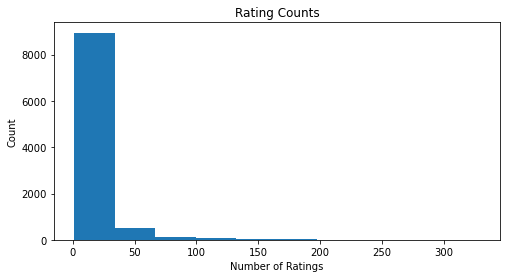

In [88]:
#histogram of rating count
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(movie_ratings[('rating','count')],bins=10)
ax.set_title('Rating Counts')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Ratings')
plt.show()

It looks like if we limit the movies for the survey to any movie that has more than 25 ratings we will have a good number of movies that the user has possibly seen and that enough other people have rated.

In [89]:
survey_movies = movie_ratings[movie_ratings[('rating','count')]>25]
survey_movies

rating  \
                                                                                             mean   
movieId title                               genres                                                  
1       Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy  3.920930   
2       Jumanji (1995)                      Adventure|Children|Fantasy                   3.431818   
3       Grumpier Old Men (1995)             Comedy|Romance                               3.259615   
5       Father of the Bride Part II (1995)  Comedy                                       3.071429   
6       Heat (1995)                         Action|Crime|Thriller                        3.946078   
...                                                                                           ...   
139385  The Revenant (2015)                 Adventure|Drama                              3.903226   
148626  Big Short, The (2015)               Drama                                        3.961538   
152081  Zootopia (2016)                     Action|Adventure|Animation|Children|Comedy   3.890625   
164179  Arrival (2016)                      Sci-Fi                                       3.980769   
166528  Rogue One: A Star Wars Story (2016) Action|Adventure|Fantasy|Sci-Fi              3.925926   

                                                                                               
                                                                                        count  
movieId title                               genres                                             
1       Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy   215  
2       Jumanji (1995)                      Adventure|Children|Fantasy                    110  
3       Grumpier Old Men (1995)             Comedy|Romance                                 52  
5       Father of the Bride Part II (1995)  Comedy                                         49  
6       Heat (1995)                         Action|Crime|Thriller                         102  
...                                                                                       ...  
139385  The Revenant (2015)                 Adventure|Drama                                31  
148626  Big Short, The (2015)               Drama                                          26  
152081  Zootopia (2016)                     Action|Adventure|Animation|Children|Comedy     32  
164179  Arrival (2016)                      Sci-Fi                                         26  
166528  Rogue One: A Star Wars Story (2016) Action|Adventure|Fantasy|Sci-Fi                27  

[1012 rows x 2 columns]

1012 movies will be included in our user rating survey.

## Create User - Rating Matrix

We will create a matrix that has users and columns for each movie with that user ratings. This will be a very large sparse matrix. -- lots of zeros...

use df  and pivot userId,movieId,rating

In [90]:
##create matrix from 
model_matrix = df.pivot(index='userId',columns='movieId',values='rating').fillna(0)
model_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
model_matrix.shape

(610, 9724)

In [25]:
non_zero = np.count_nonzero(model_matrix)
sparse_percentage = 1-(non_zero/(model_matrix.shape[0]*model_matrix.shape[1]))
print('matrix sparse percentage: {}%'.format(round(sparse_percentage *100)))


matrix sparse percentage: 98%


As expected this is a sparse matrix will help in deciding which direction we will move in our iterative modeling process.  Using the surprise library we will not need the model_matrix but it is interesting to see that our ratings data is 98% empty.  

## Surprise 

We will import the needed tools from the Surprise libray below and begin our iterative modeling process.


In [26]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, KNNWithMeans, KNNBasic, KNNBaseline, KNNWithZScore
from surprise.model_selection import GridSearchCV

We need our ratings data here.  Lets make sure that we have the right data.  We mostlikely need to drop the timestamp column still.


In [27]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
# drop timestamp
rate_df = ratings.drop('timestamp', axis=1)

In [29]:
#create the surprise dataset
reader=Reader()
data=Dataset.load_from_df(rate_df,reader)
dataset=data.build_full_trainset()
dataset

Lets explore the new surprise dataset to see if everything looks correct.  We can look at the items and users to see how it compares to our original data.

In [30]:
#print out users and items
items = dataset.n_items
users = dataset.n_users
print('Users: {}\tItems: {}'.format(users,items))

Users: 610	Items: 9724


This matches with our matrix above. We are ready to model.

## Iterative Modeling Process

For our modeling process we will begin with our baseline model.  Because we have seen this data before we will start with our best parameters from a SVD model and then grid search around those values to see if we can do better.  

### SVD
Singular Value Decomposition is a widely used dimensionality reduction tool.  
In our previous work we found by using gridsearch that {'n_factors': 50, 'reg_all': 0.05} were the best parameters. We will run that first for our baseline model.

In [31]:
#svd baseline
baseline_model = SVD(n_factors=50,reg_all=0.05,random_state=42)
baseline_model.fit(dataset)


In [36]:
#cross-validate baseline model
baseline_cv = cross_validate(baseline_model,data,n_jobs=-1)

In [37]:
#print out results
for i in baseline_cv.items():
    print(i,'/n')

('test_rmse', array([0.87740045, 0.8725949 , 0.86461757, 0.86556687, 0.86792408])) /n
('test_mae', array([0.67557659, 0.67078698, 0.66396457, 0.66531183, 0.66772584])) /n
('fit_time', (2.5851027965545654, 2.6380960941314697, 2.6022961139678955, 2.585526943206787, 2.5797300338745117)) /n
('test_time', (0.0973811149597168, 0.0878441333770752, 0.08504104614257812, 0.0969390869140625, 0.09771895408630371)) /n


In [38]:
model_avg = np.mean(baseline_cv['test_rmse'])
model_avg

0.8696207723585667

## Create a Dictionary To Store Model Results

We want to store our model name and rmse in a dictionary to easily compare.  We will also create a function to add further scores to our dictionary.

In [39]:
#score_dict will be used to store 
score_dict={}
def add_to_dict(dict,model,score):
    dict[model]=score
    return dict
add_to_dict(score_dict,'baseline_model',model_avg)

{'baseline_model': 0.8696207723585667}

## SVD GridSearch

Lets see if we can improve on on our model by using a parameter grid search.  

We used n_factors = 50(number of factors) and reg_all=0.05(regularization term)
for these we will include values closer to these to test, because we had a wider range in our previous work. 

lets include:
* n_epochs - The number of iterations default- 100
* lr_all – Parameter learning rate  default - 0.005


In [65]:
#svd gridsearch  -  This will take some time.  Be patient.
params = {'n_factors':[40,50,60],
         'reg_all':[0.025,0.05, 0.075],
         'n_epochs':[25,50,100],
         'lr_all':[0.0025,0.005,0.01]}
svd_gs = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
svd_gs.fit(data)

In [69]:
print(svd_gs.best_score)
print(svd_gs.best_params)

{'rmse': 0.8521706144532271, 'mae': 0.6524552323348267}
{'rmse': {'n_factors': 60, 'reg_all': 0.075, 'n_epochs': 50, 'lr_all': 0.01}, 'mae': {'n_factors': 60, 'reg_all': 0.075, 'n_epochs': 50, 'lr_all': 0.01}}


## Function to Fit and Get RMSE Scores From Model

In [40]:
best_svd = SVD(n_factors=60, reg_all=0.075, lr_all=0.01, random_state=42)

In [41]:
##function
def model_process(model,name,train=dataset,full_data=data,dict=score_dict):
    '''
    model- actual model
    name - string of model name for storing in dictionary
    train - training data
    full_data - all of the data
    dict - scoring dictionary
    
    '''
    #fit the model
    model.fit(train)
    
    #cross-validate the model
    model_cv = cross_validate(model,full_data,n_jobs=-1,cv=5,verbose=True)
    
    #score RMSE
    rmse = np.mean(model_cv['test_rmse'])
    
    #add to score dictionary
    add_to_dict(dict,name,rmse)
    
    return dict

In [42]:
#our best svd model just changes the reg_all. the others were default settings
best_svd = SVD(n_factors=60, reg_all=0.075,lr_all=0.01, random_state=42)
#fit, score and add to dictionary using function
model_process(best_svd,'best_svd',dataset,data,score_dict)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8604  0.8585  0.8564  0.8625  0.8636  0.8603  0.0026  
MAE (testset)     0.6590  0.6577  0.6597  0.6630  0.6637  0.6606  0.0023  
Fit time          3.86    2.96    2.97    2.93    2.98    3.14    0.36    
Test time         0.09    0.11    0.10    0.09    0.09    0.10    0.01    


{'baseline_model': 0.8696207723585667, 'best_svd': 0.8603022385140962}

This is only a slight improvement in our model.  Rememeber that our rating scale is 1-5.  So we are still off by about .86 of rating point.

Below we will try some other models

## KNN Algorithms

lets compare

* KNNBasic 
* KNNBaseline
* KNNWithMeans
* KNNWithZScore

We can do gridsearch with these to see if we can do better.

### KNNBasic



In [43]:
##KNNBasic
knn_basic = KNNBasic(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_basic,'knn_basic')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9710  0.9740  0.9729  0.9715  0.9770  0.9733  0.0021  
MAE (testset)     0.7491  0.7505  0.7527  0.7514  0.7558  0.7519  0.0023  
Fit time          0.34    0.32    0.33    0.33    0.32    0.33    0.01    
Test time         1.17    1.14    1.12    1.10    1.07    1.12    0.03    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645}

### KNNBaseline



In [44]:
knn_baseline = KNNBaseline(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline,'knn_baseline')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8742  0.8705  0.8752  0.8847  0.8789  0.8767  0.0048  
MAE (testset)     0.6689  0.6665  0.6678  0.6772  0.6693  0.6699  0.0038  
Fit time          0.37    0.36    0.35    0.36    0.36    0.36    0.00    
Test time         1.49    1.47    1.47    1.44    1.42    1.46    0.03    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645,
 'knn_baseline': 0.8767047897485712}

### KNNWithMeans

In [45]:
#KNNWithMeans
knn_wm = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_wm,'knn_wm')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8986  0.8956  0.8950  0.8936  0.8977  0.8961  0.0018  
MAE (testset)     0.6834  0.6836  0.6815  0.6787  0.6859  0.6826  0.0024  
Fit time          0.33    0.34    0.33    0.32    0.29    0.32    0.01    
Test time         1.22    1.25    1.19    1.16    1.14    1.19    0.04    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645,
 'knn_baseline': 0.8767047897485712,
 'knn_wm': 0.8960797993203589}

### KNNWithZScore

In [46]:
knn_wzs = KNNWithZScore(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_wzs,'knn_wzs')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8949  0.8895  0.8968  0.8941  0.8903  0.8931  0.0028  
MAE (testset)     0.6766  0.6723  0.6793  0.6749  0.6712  0.6749  0.0029  
Fit time          0.36    0.35    0.35    0.38    0.32    0.35    0.02    
Test time         1.35    1.37    1.33    1.30    1.31    1.33    0.03    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645,
 'knn_baseline': 0.8767047897485712,
 'knn_wm': 0.8960797993203589,
 'knn_wzs': 0.8931094272923434}

the knn_baseline model was the best of the 3 and just a little bit higher than our best svd model.  We can try to tune that model to see if we can improve the performance.

### KNNBaseline HyperTuning


In [47]:
#KNNBaseline with more parameters
knn_baseline_min_k_5 = KNNBaseline(min_k=5,sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline_min_k_5,'knn_baseline_min_k_5')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8683  0.8567  0.8706  0.8665  0.8678  0.8660  0.0048  
MAE (testset)     0.6657  0.6566  0.6673  0.6650  0.6625  0.6634  0.0038  
Fit time          0.39    0.38    0.39    0.36    0.33    0.37    0.02    
Test time         1.49    1.49    1.47    1.45    1.40    1.46    0.03    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645,
 'knn_baseline': 0.8767047897485712,
 'knn_wm': 0.8960797993203589,
 'knn_wzs': 0.8931094272923434,
 'knn_baseline_min_k_5': 0.8659789234271494}

In [48]:
#KNNBaseline with more parameters
knn_baseline_k_30 = KNNBaseline(min_k=30,sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline_k_30,'knn_baseline_k_30')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8696  0.8667  0.8630  0.8602  0.8712  0.8662  0.0041  
MAE (testset)     0.6671  0.6677  0.6616  0.6617  0.6694  0.6655  0.0032  
Fit time          0.35    0.37    0.37    0.36    0.33    0.35    0.01    
Test time         1.49    1.51    1.50    1.46    1.44    1.48    0.03    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645,
 'knn_baseline': 0.8767047897485712,
 'knn_wm': 0.8960797993203589,
 'knn_wzs': 0.8931094272923434,
 'knn_baseline_min_k_5': 0.8659789234271494,
 'knn_baseline_k_30': 0.8661514031893114}

These both slightly improved our RMSE.  It may warrant taking the time to run a gridsearch with different values of k, min_k

### GridSearchCV with KNNBaseline


In [49]:
#this will take a minute or so....
params = {'k': [15,30,40],
          'min_k': [1,3,5]} 
kb = KNNBaseline(sim_options = {'name': 'pearson', 'user_based': True})
knnbaseline_gs = GridSearchCV(KNNBaseline,param_grid=params)
knnbaseline_gs.fit(data)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [50]:
#Get the scores and best params
print(knnbaseline_gs.best_params)
print(knnbaseline_gs.best_score)

{'rmse': {'k': 30, 'min_k': 5}, 'mae': {'k': 30, 'min_k': 3}}
{'rmse': 0.8661776901329581, 'mae': 0.6633209708754565}


In [51]:
knn_baseline_best = KNNBaseline(k=30,min_k=5,sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline_best,'knn_baseline_best')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8647  0.8630  0.8649  0.8684  0.8724  0.8667  0.0034  
MAE (testset)     0.6620  0.6629  0.6643  0.6652  0.6677  0.6644  0.0020  
Fit time          0.37    0.38    0.39    0.36    0.35    0.37    0.02    
Test time         1.40    1.43    1.41    1.39    1.33    1.39    0.03    


{'baseline_model': 0.8696207723585667,
 'best_svd': 0.8603022385140962,
 'knn_basic': 0.9732749716331645,
 'knn_baseline': 0.8767047897485712,
 'knn_wm': 0.8960797993203589,
 'knn_wzs': 0.8931094272923434,
 'knn_baseline_min_k_5': 0.8659789234271494,
 'knn_baseline_k_30': 0.8661514031893114,
 'knn_baseline_best': 0.8666955874324745}

## Final Model Selection
Our best_svd model has the best results.  Since there is not a lot of progress it is best to move on with this model.  

We will use this model to make predicitons and reccomendations


## Making Predicitons

In [52]:
#making predictions for user 10 movie 1
pred = best_svd.predict(10,1)
pred

Prediction(uid=10, iid=1, r_ui=None, est=3.4843803919078966, details={'was_impossible': False})

In [53]:
#use the movies dataframe to get actual movie information for reccomendations
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


## Displaying Movies

In [54]:
#retrieve movie information from our prediction
title = movies.loc[movies['movieId'] == pred[1]]['title'][0]
genre = movies.loc[movies['movieId'] == pred[1]]['genres'][0]
pred_rating=round(pred[3],1)
print('Title: {}\nGenre: {}\nProjected Rating: {}'.format(title,genre,pred_rating))

Title: Toy Story (1995)
Genre: Adventure|Animation|Children|Comedy|Fantasy
Projected Rating: 3.5


## Find n Movie Reccomendations For Specific User

Below we will create a function that will return n movies for a specific user.

In [55]:
#get number of items 
dataset.n_items

9724

In [58]:
#import heapq for getting top items from list
import heapq
#define reccomendation function
def n_movies_rec(n,user,model):
    
    '''
    n- number of reccomendations
    user - which user
    model - model to make the predictions
    
    '''
    total_items = dataset.n_items
    #list for movie ratings
    movie_ratings = []
    #dictionary for movie displat
    display_movies=[]
    
    #populate movie_ratings for raw list
    for item in range(total_items):
        movie_ratings.append(model.predict(user,item))
    #use heapq.nlagerst
    raw_list = heapq.nlargest(n,movie_ratings,key=lambda x:x[3])
    
    # get movie info from movies dataframe
    for p in raw_list:
        temp = movies.loc[movies['movieId'] == p[1]]
        title = temp.title.to_string()
        title = re.sub("[^a-zA-Z,'']+", " ", title)
        genre = temp.genres.to_string()
        genre = re.sub("[^a-zA-Z|]+", " ", genre)
        rating = 'predicted rating: ' + str(round(p[3],2))
        display_movies.append(rating+ ' ' + title +' '+ genre)
    return display_movies

#test the function for 10 movies for user 110
n_movies_rec(10,110,best_svd)

['predicted rating: 4.41  Paths of Glory   Drama|War',
 "predicted rating: 4.4  Guess Who's Coming to Dinner   Drama",
 'predicted rating: 4.39  Pulp Fiction   Comedy|Crime|Drama|Thriller',
 'predicted rating: 4.37  Seventh Seal, The Sjunde inseglet, Det   Drama',
 'predicted rating: 4.37  Shawshank Redemption, The   Crime|Drama',
 'predicted rating: 4.37  Godfather, The   Crime|Drama',
 'predicted rating: 4.35  Streetcar Named Desire, A   Drama',
 'predicted rating: 4.34  Rear Window   Mystery|Thriller',
 'predicted rating: 4.32  Cool Hand Luke   Drama',
 'predicted rating: 4.32  Angry Men   Drama']

In [62]:
#try out another user to make sure this is working 
n_movies_rec(10,8,best_svd)

['predicted rating: 4.5  Shawshank Redemption, The   Crime|Drama',
 "predicted rating: 4.46  Guess Who's Coming to Dinner   Drama",
 'predicted rating: 4.45  Streetcar Named Desire, A   Drama',
 'predicted rating: 4.44  Godfather, The   Crime|Drama',
 'predicted rating: 4.42  Paths of Glory   Drama|War',
 'predicted rating: 4.42  Monty Python Live at the Hollywood Bowl   Comedy',
 'predicted rating: 4.41  Philadelphia Story, The   Comedy|Drama|Romance',
 'predicted rating: 4.39  Double Indemnity   Crime|Drama|Film Noir',
 'predicted rating: 4.38  Boot, Das Boat, The   Action|Drama|War',
 'predicted rating: 4.37  Dr Strangelove or How I Learned to Stop Worr   Comedy|War']

This will give us reccomendations for existing users.  We will then need to add by category and beable to create a new user and provide results

## Obtain New User Ratings

We will create a function to obtain new user ratings.  We will want to gather at least 5 ratings in order to make reccomendations from our model.  The user will be given movies to rate on a scale of 0.5 to 5.  They should have the option to skip a movie if they have not seen it.  

* use survey_movies dataframe for this function.  This should make it more likely that the new user has seen the movie

We need to be able to do the following:

* get new user ratings 
* add ratings to the ratings 'data'
* read the data into a suprise dataset
* train the model
* return the predicitons (5)

We will create funcitons to work through this process and then create a master function to complete the entire process.

### Get New User Ratings
We need to use the original rate_df to add the ratings of the new user. 

In [80]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [81]:
np.max(rate_df.userId)

610

In [94]:
survey_movies

rating  \
                                                                                             mean   
movieId title                               genres                                                  
1       Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy  3.920930   
2       Jumanji (1995)                      Adventure|Children|Fantasy                   3.431818   
3       Grumpier Old Men (1995)             Comedy|Romance                               3.259615   
5       Father of the Bride Part II (1995)  Comedy                                       3.071429   
6       Heat (1995)                         Action|Crime|Thriller                        3.946078   
...                                                                                           ...   
139385  The Revenant (2015)                 Adventure|Drama                              3.903226   
148626  Big Short, The (2015)               Drama                                        3.961538   
152081  Zootopia (2016)                     Action|Adventure|Animation|Children|Comedy   3.890625   
164179  Arrival (2016)                      Sci-Fi                                       3.980769   
166528  Rogue One: A Star Wars Story (2016) Action|Adventure|Fantasy|Sci-Fi              3.925926   

                                                                                               
                                                                                        count  
movieId title                               genres                                             
1       Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy   215  
2       Jumanji (1995)                      Adventure|Children|Fantasy                    110  
3       Grumpier Old Men (1995)             Comedy|Romance                                 52  
5       Father of the Bride Part II (1995)  Comedy                                         49  
6       Heat (1995)                         Action|Crime|Thriller                         102  
...                                                                                       ...  
139385  The Revenant (2015)                 Adventure|Drama                                31  
148626  Big Short, The (2015)               Drama                                          26  
152081  Zootopia (2016)                     Action|Adventure|Animation|Children|Comedy     32  
164179  Arrival (2016)                      Sci-Fi                                         26  
166528  Rogue One: A Star Wars Story (2016) Action|Adventure|Fantasy|Sci-Fi                27  

[1012 rows x 2 columns]

In [ ]:
def new_user_ratings(movies,n,genre=None):
    '''
    movies - movie dataframe
    n - (int) number of movies
    genre- (str) can specify a genre to further limit the data
    '''

    #narrow down the movies if genre is selected
    to_be_rated = movies
    if genre:
        to_be_rated = movies[movies['genres'].str.contains(genre)]
    
    #create new user id one higher than the max userId value
    user_id = np.max(rate_df.userId)+1
    
    #list to store the new ratings
    ratings = []
    #use while loop to get n ratings from our survey_movies
    while n > 0:
        # select a sample movie
        movie = to_be_rated.sample(1)
        print(movie)
        rating = input("Rate the movie from 1-5.  enter 'n' if you haven't seen the film")
        # make sure user enters an acceptable value
        if rating not in [1,2,3,4,5]:
            continue
        else:
            #need to use column names from rate_df
            rated = {'userId':user_id,'movieId':to_be_rated['movieId'].values[0],'rating':rating}
            ratings.append(rated)
            n -=1
    return ratings


In [ ]:
new_user_ratings(survey_movies,5)